## Data Background Info
The data is exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.The original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

## Column Titles:

Below is a preview of a couple columns we'll work with from the **dete_survey.csv**:

* **ID:** An id used to identify the participant of the survey
* **SeparationType:** The reason why the person's employment ended
* **Cease Date:** The year or month the person's employment ended
* **DETE Start Date:** The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* **Record ID:** An id used to identify the participant of the survey
* **Reason for ceasing employment:** The reason why the person's employment ended
* **LengthofServiceOverall. Overall Length of Service at Institute (in years):** The length of the person's employment (in years)

## Goal
**Answer the Question:**
Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [ ]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## First Impressions

In [ ]:
# First Impressions for dete_survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [ ]:
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [ ]:
#Quick exploration of the data
pd.options.display.max_columns = 150 # to avoid truncated output
print(dete_survey.shape)
dete_survey.head()

(822, 56)


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


observations based on the work above:

* dete_survey contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Finding Null Values and Basic Column Titles Cleanup

In [ ]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
print(dete_survey.shape)

(822, 56)


In [ ]:
# drop unnecessary dete columns
dropped_cols = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(columns=dropped_cols)
print(dete_survey_updated.shape)

(822, 35)


In [ ]:
print(tafe_survey.shape)

(702, 72)


In [ ]:
# drop unnecessary tafe columns
dropped_cols = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(columns=dropped_cols)
print(tafe_survey_updated.shape)

(702, 23)


Dropped a bunch of columns not relevant to the analysis.

In [ ]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [ ]:
new_col_name_dict = {'Record ID': 'id',
                     'CESSATION YEAR': 'cease_date',
                     'Reason for ceasing employment': 'separationtype',
                     'Gender. What is your Gender?': 'gender',
                     'CurrentAge. Current Age': 'age',
                     'Employment Type. Employment Type': 'employment_status',
                     'Classification. Classification': 'position',
                     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
                     }
tafe_survey_updated.rename(columns=new_col_name_dict, inplace=True)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


Standardised the column names
* lower
* spaces to underscores
* stripped extra spaces at start and end

Also: clarified and standardized a few verbose column names

## Filtering out people who didn't quit
### aka Filtering by people who DID quit

In [ ]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [ ]:
# dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains("Resignation")]
dete_resignations = dete_survey_updated.copy()
dete_resignations['separationtype'] = dete_resignations['separationtype'].str.replace(r"Resignation.*", "Resignation")
dete_resignations['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [ ]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [ ]:
# quit_filter = tafe_survey_updated['separationtype'].str.contains("Resignation")
# quit_filter.describe()
# tafe_resignations = tafe_survey_updated[quit_filter].copy()

dete_resignations = dete_resignations[dete_resignations['separationtype'] == 'Resignation'].copy()
dete_resignations['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

In [ ]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

Using the 'separationtype' column, I filtered the people who resigned.
Removed out all other rows (aka people)

## Verifying Employment Start & Cease Years

In [ ]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [ ]:
# i tried to extract the year at the end of every date
# the return value has the incorrect # of rows
"""
res_year = dete_resignations['cease_date'].str.extractall(r"(?P<year>[1-2][0-9]{3})$")
res_year['year'] = res_year['year'].astype(float)
dete_resignations['cease_date'] = res_year['year']
"""

'\nres_year = dete_resignations[\'cease_date\'].str.extractall(r"(?P<year>[1-2][0-9]{3})$")\nres_year[\'year\'] = res_year[\'year\'].astype(float)\ndete_resignations[\'cease_date\'] = res_year[\'year\']\n'

In [ ]:
# Extract the years and convert them to a float type

# intended code
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")
dete_resignations['cease_date'].value_counts().sort_values()

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [ ]:
# Check the unique values and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [ ]:
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

Cleaned the dates in dete_resignations['cease_date']
Sorted employment date range for everyone who resigned to better ID anomalous entries.

In [ ]:
# dete_resignations needs a column denoting employment duration (like tafe_resignations)
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identifying Dissatisfied Resignations
* Take all of the columns below
* combine them into their respective T/F 'dissatisfied' column
* Set these values based on input
    * NaN: if NaN was the entry
    * F: if '-' was the entry
    * T: if there was any entry

**tafe_survey_updated:**
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

**dete_survey_updated:**
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload


In [ ]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [ ]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [ ]:
def update_vals(resign_reason):
    if resign_reason == '-':
        return False
    elif  pd.isnull(resign_reason):
        return np.nan
    return True

In [ ]:
dissatisfaction_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[dissatisfaction_cols].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
dissatisfaction_cols = ['job_dissatisfaction',
                        'dissatisfaction_with_the_department',
                        'physical_work_environment',
                        'lack_of_recognition',
                        'lack_of_job_security',
                        'work_location',
                        'employment_conditions',
                        'work_life_balance',
                        'workload'
                       ]
for res in dissatisfaction_cols:
    print(dete_resignations[res].value_counts())

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64


In [ ]:
dete_resignations['dissatisfied'] = dete_resignations[dissatisfaction_cols].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combine the DETE and TAFE data sets


In [ ]:
#  mark rows to signify their origin (helpful after merging)
dete_resignations_up['institute'] = ['DETE']*(dete_resignations_up.shape[0])
tafe_resignations_up['institute'] = ['TAFE']*(tafe_resignations_up.shape[0])

In [ ]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [ ]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

In [ ]:
# display the columns above the threshold (not dropped)
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

## Clean the Employment Duration and categorize employees by it

In [ ]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [ ]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [ ]:
def categorize_service(years):
    if pd.isnull(years):
        return np.nan
    elif years < 3:
        return 'New'
    elif years < 7:
        return 'Expirienced'
    elif years < 11:
        return 'Established'

    return 'Veteran'

In [ ]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorize_service)
combined_updated['service_cat'].value_counts()

New            193
Expirienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [ ]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

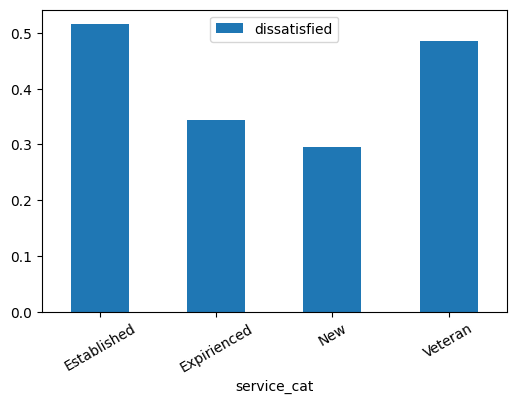

In [ ]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
# note: since satisfied employees are 0, they are discounted and only dissatisfied are sums
# making the 'mean' a ratio of dissatisfied/total_count
dis_pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.mean)


%matplotlib inline
dis_pivot.plot(kind='bar', rot=30)

Graphed the Ratio of dissatisfied per their category of employment duration